In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Show Confirmed, Cured and Dead in different places

In [2]:
data = pd.read_csv('COVID-19.csv')
data

,date,country,countryCode,province,provinceCode,city,cityCode,confirmed,suspected,cured,dead
0,2019-12-01,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
1,2019-12-01,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0
2,2019-12-01,中国,CN,湖北省,420000.0,武汉市,420100,1,0,0,0
3,2019-12-02,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
4,2019-12-02,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41643,2020-04-03,马约特,YT,NaN,NaN,NaN,NaN,101,0,0,0
41644,2020-04-03,南非,ZA,NaN,NaN,NaN,NaN,1462,0,50,5
41645,2020-04-03,赞比亚,ZM,NaN,NaN,NaN,NaN,39,0,0,1
41646,2020-04-03,津巴布韦,ZW,NaN,NaN,NaN,NaN,9,0,0,1


In [3]:
def showCCDofCountry(country):
    covid_country = data[pd.isna(data['province'])]
    covid_country = covid_country[covid_country.country==country]
    covid_country = covid_country[covid_country.confirmed > 100]
    covid_country.set_index('date',inplace=True)
    covid_country.sort_index()
    covid_country = covid_country.drop(['countryCode', 'province', 'provinceCode', 'city', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_country.confirmed, 'b', label="confirmed")
    plt.plot(covid_country.cured, '--g', label="cured")
    plt.plot(covid_country.dead, ':r', label="dead")

    date = covid_country.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of CCD")

    plt.legend()
    plt.show()

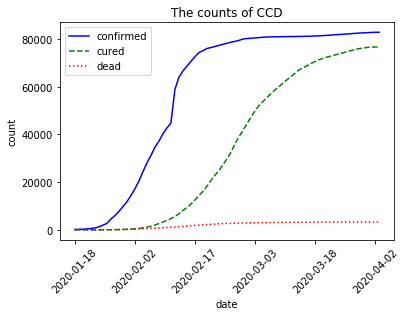

In [4]:
showCCDofCountry("中国")

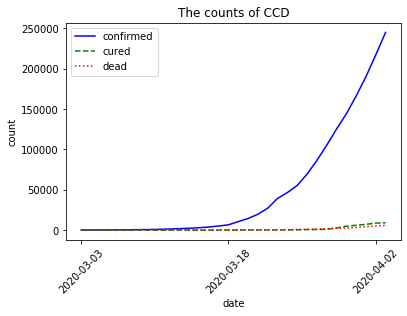

In [5]:
showCCDofCountry("美国")

In [6]:
covid_china = data[data.country=='中国']
covid_china

,date,country,countryCode,province,provinceCode,city,cityCode,confirmed,suspected,cured,dead
0,2019-12-01,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
1,2019-12-01,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0
2,2019-12-01,中国,CN,湖北省,420000.0,武汉市,420100,1,0,0,0
3,2019-12-02,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
4,2019-12-02,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41489,2020-04-03,中国,CN,台湾省,710000.0,台湾省,710000,339,0,45,5
41490,2020-04-03,中国,CN,香港特别行政区,810000.0,NaN,NaN,802,0,154,4
41491,2020-04-03,中国,CN,香港特别行政区,810000.0,香港特别行政区,810000,802,0,154,4
41492,2020-04-03,中国,CN,澳门特别行政区,820000.0,NaN,NaN,41,0,10,0


In [7]:
def showCCDofProvince_China(province):
    covid_china_province = covid_china[pd.isna(covid_china['city'])]
    covid_china_province = covid_china_province[covid_china_province.province==province]
    covid_china_province.set_index('date',inplace=True)
    covid_china_province.sort_index()
    covid_china_province = covid_china_province.drop(['country', 'countryCode', 'provinceCode', 'city', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_china_province.confirmed, 'b', label="confirmed")
    plt.plot(covid_china_province.cured, '--g', label="cured")
    plt.plot(covid_china_province.dead, ':r', label="dead")

    date = covid_china_province.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of CCD")

    plt.legend()
    plt.show()

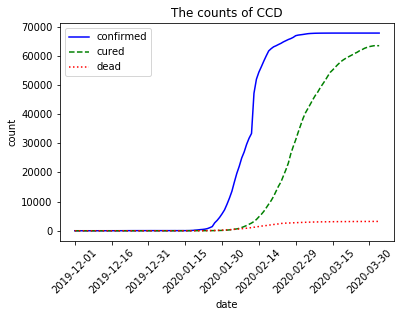

In [8]:
showCCDofProvince_China("湖北省")

In [9]:
def showCCDofCity_China(city):
    covid_china_city = covid_china[covid_china.city==city]
    covid_china_city.set_index('date',inplace=True)
    covid_china_city.sort_index()
    covid_china_city = covid_china_city.drop(['country', 'countryCode', 'province', 'provinceCode', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_china_city.confirmed, 'b', label="confirmed")
    plt.plot(covid_china_city.cured, '--g', label="cured")
    plt.plot(covid_china_city.dead, ':r', label="dead")

    date = covid_china_city.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of CCD")

    plt.legend()
    plt.show()

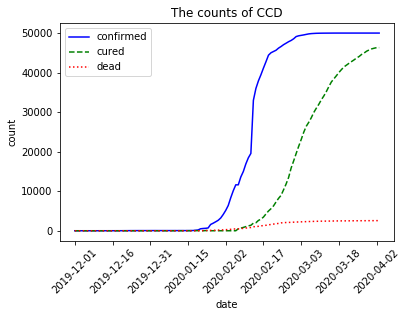

In [10]:
showCCDofCity_China("武汉市")

## Show Infective and Recovered/Dead in different places

In [11]:
def showIRofCountry(country):
    covid_country = data[pd.isna(data['province'])]
    covid_country = covid_country[covid_country.country==country]
    covid_country = covid_country[covid_country.confirmed > 100]
    covid_country.set_index('date',inplace=True)
    covid_country.sort_index()
    covid_country = covid_country.drop(['countryCode', 'province', 'provinceCode', 'city', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_country.confirmed - covid_country.cured - covid_country.dead, 'b', label="Infective")
    plt.plot(covid_country.cured + covid_country.dead, '--g', label="Recovered/Dead")

    date = covid_country.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of IR")

    plt.legend()
    plt.show()

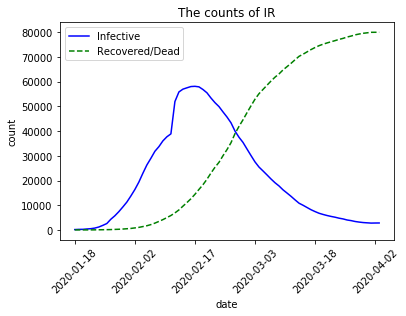

In [12]:
showIRofCountry("中国")

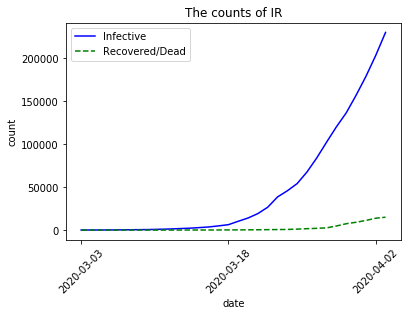

In [13]:
showIRofCountry("美国")

In [14]:
def showIRofProvince_China(province):
    covid_china_province = covid_china[pd.isna(covid_china['city'])]
    covid_china_province = covid_china_province[covid_china_province.province==province]
    covid_china_province.set_index('date',inplace=True)
    covid_china_province.sort_index()
    covid_china_province = covid_china_province.drop(['country', 'countryCode', 'provinceCode', 'city', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_china_province.confirmed - covid_china_province.cured - covid_china_province.dead, 'b', label="Infective")
    plt.plot(covid_china_province.cured + covid_china_province.dead, '--g', label="Recovered/Dead")

    date = covid_china_province.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of CCD")

    plt.legend()
    plt.show()

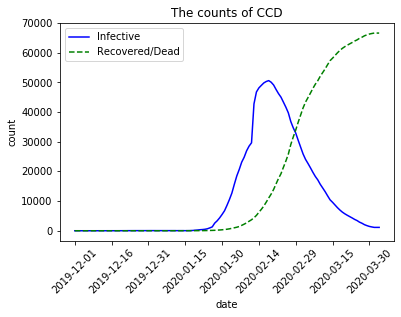

In [15]:
showIRofProvince_China("湖北省")

In [16]:
def showIRofCity_China(city):
    covid_china_city = covid_china[covid_china.city==city]
    covid_china_city.set_index('date',inplace=True)
    covid_china_city.sort_index()
    covid_china_city = covid_china_city.drop(['country', 'countryCode', 'province', 'provinceCode', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('count')

    plt.plot(covid_china_city.confirmed - covid_china_city.cured - covid_china_city.dead, 'b', label="Infective")
    plt.plot(covid_china_city.cured + covid_china_city.dead, '--g', label="Recovered/Dead")

    date = covid_china_city.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of IR")

    plt.legend()
    plt.show()

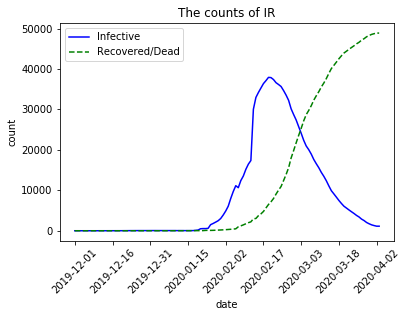

In [17]:
showIRofCity_China("武汉市")

## Show the Rates of Infective and Recovered/Dead in different places

In [18]:
def showIR_RateofCountry(country):
    covid_country = data[pd.isna(data['province'])]
    covid_country = covid_country[covid_country.country==country]
    covid_country = covid_country[covid_country.confirmed > 100]
    covid_country.set_index('date',inplace=True)
    covid_country.sort_index()
    covid_country = covid_country.drop(['countryCode', 'province', 'provinceCode', 'city', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('rate')

    plt.plot((covid_country.confirmed - covid_country.cured - covid_country.dead)/(max(covid_country.confirmed)) , 'b', label="Infective")
    plt.plot((covid_country.cured + covid_country.dead)/max(covid_country.confirmed), '--g', label="Recovered/Dead")

    date = covid_country.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of IR_Rate")

    plt.legend()
    plt.show()

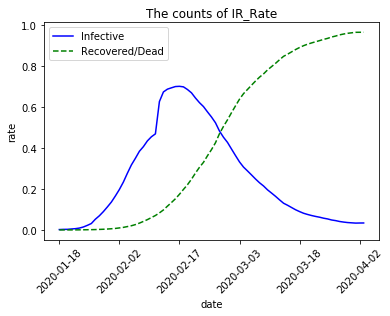

In [19]:
showIR_RateofCountry("中国")

In [20]:
def showIR_RateofWuhan():
    covid_china_city = covid_china[covid_china.city=="武汉市"]
    covid_china_city = covid_china_city[covid_china_city.confirmed > 40]
    covid_china_city.set_index('date',inplace=True)
    covid_china_city.sort_index()
    covid_china_city = covid_china_city.drop(['country', 'countryCode', 'province', 'provinceCode', 'cityCode', 'suspected'], axis='columns')
    plt.xlabel('date')
    plt.ylabel('rate')

    population = 5000000
    plt.plot((covid_china_city.confirmed - covid_china_city.cured - covid_china_city.dead) / population, 'b', label="Infective")
    plt.plot((covid_china_city.cured + covid_china_city.dead) / population, '--g', label="Recovered/Dead")

    date = covid_china_city.index[::15]
    plt.xticks(date, rotation=45)
    
    plt.title("The counts of IR_Rate")

    plt.legend()
    plt.show()

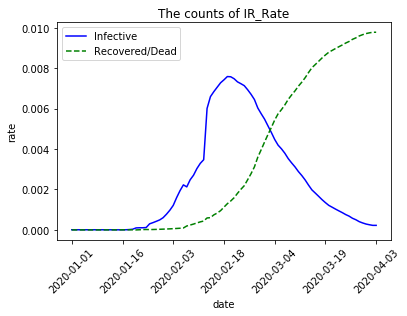

In [21]:
showIR_RateofWuhan()